# MindLens-AI — 03: Explainability (RQ1)

**RQ1:** Can explainable NLP models maintain high performance (≥80% accuracy) while providing meaningful, human-interpretable explanations aligned with mental health indicators?

Tools: SHAP (global + local) and LIME (instance-level). Includes a quantitative Interpretability Score.

In [1]:
# Setup
import sys, os
sys.path.insert(0, os.path.abspath(".."))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import shap

from src.model import load_model
from src.explainability import (
    explain_lime, explain_shap, shap_summary_plot,
    compute_interpretability_score, MH_LEXICON,
)

sns.set_theme(style="whitegrid")

# Load artifacts
model, vectorizer = load_model("../data/processed/model_artifacts.joblib")
split = joblib.load("../data/processed/test_split.joblib")
X_test = split["X_test"]
X_train = split["X_train"]
y_test = split["y_test"]
texts_test = split["texts_test"]
feature_names = split["feature_names"]

print(f"Loaded model + {len(texts_test)} test samples ✓")

Loaded model + 1530 test samples ✓


## 1. SHAP — Global Feature Importance

SHAP values shape: (1530, 5000)


c:\Users\Kartik\AppData\Local\Programs\Python\Python312\Lib\site-packages\shap\explainers\_linear.py:99: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


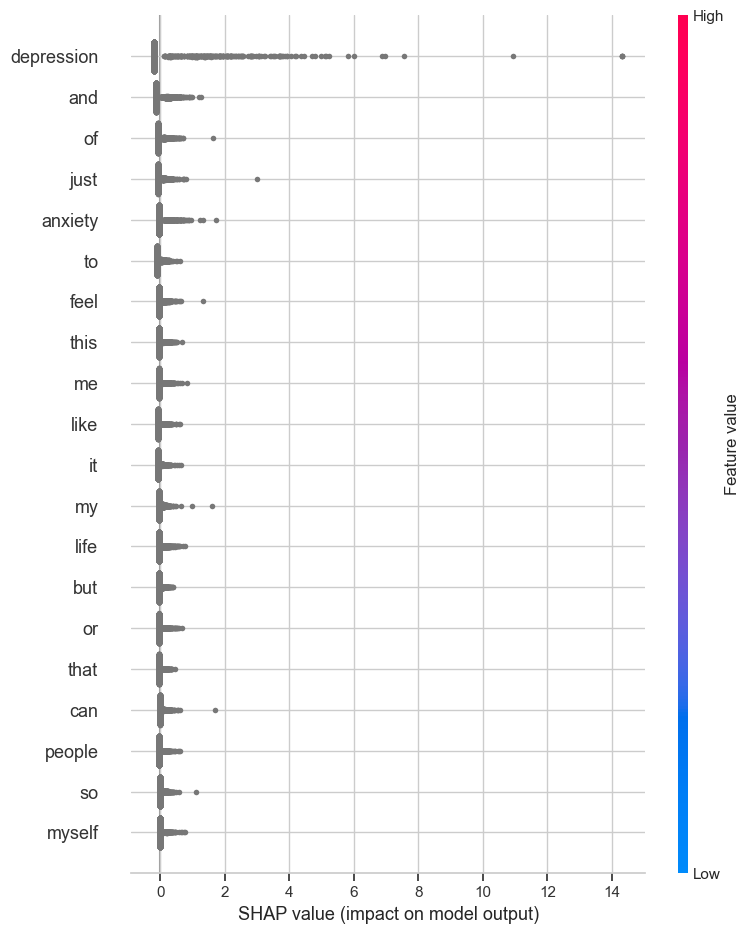

In [2]:
# Compute SHAP values
shap_values, shap_explainer = explain_shap(model, X_train, X_test, feature_names)
print(f"SHAP values shape: {shap_values.shape}")

# Summary plot (top 20 global features)
shap_summary_plot(shap_values, X_test, feature_names, max_display=20)

## 2. SHAP — Force Plots (Individual Predictions)


--- Sample 0 (True: RISK) ---
Text: lately all i basically is sleep i just don t have the energy for anything else these day i wa told i need more intensive treatment but i just don t ha...


<Figure size 640x480 with 0 Axes>

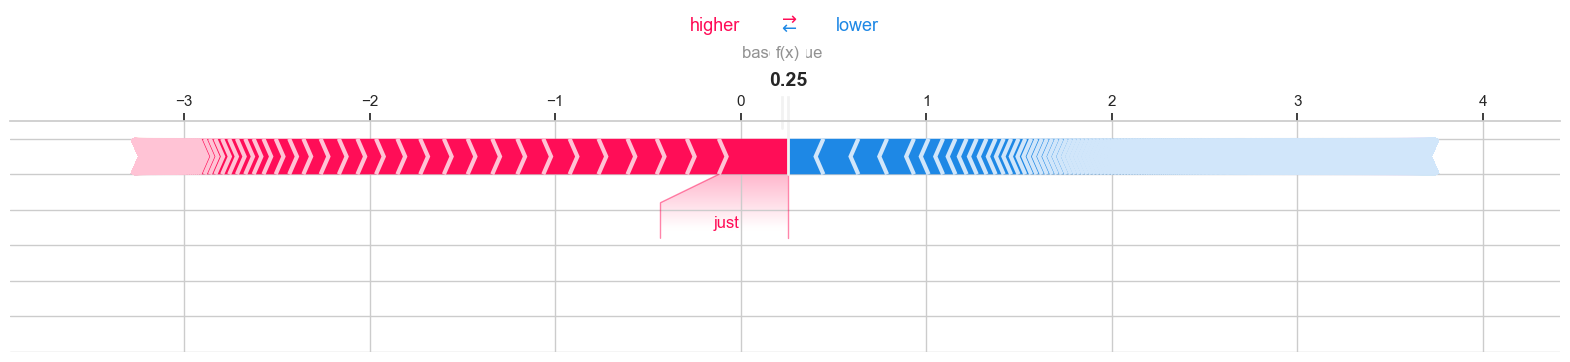


--- Sample 1 (True: RISK) ---
Text: f i am just so tired i hate my life i know there s a beautiful side to life but oh my god i don t even wan na see it if the thing i ve been through ar...


<Figure size 640x480 with 0 Axes>

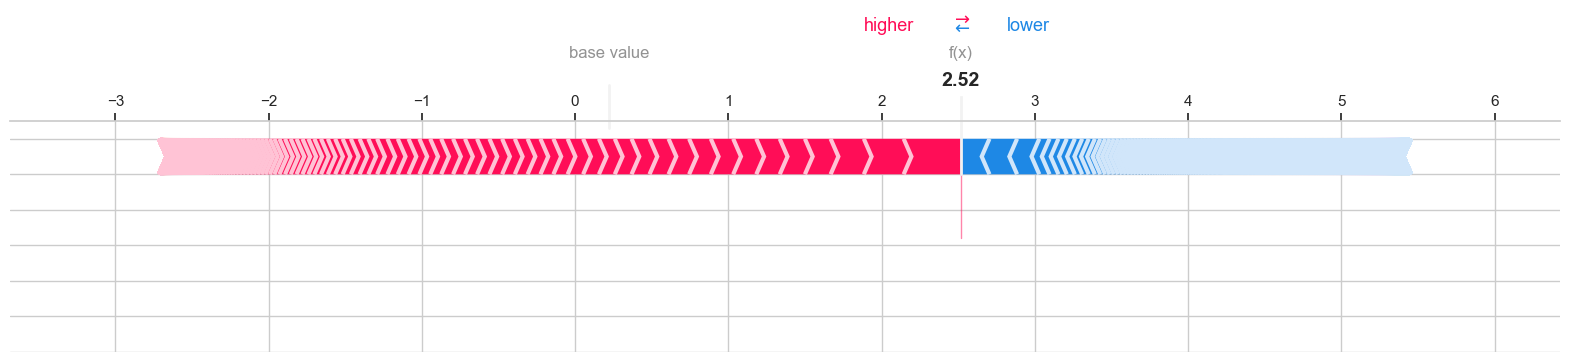


--- Sample 2 (True: RISK) ---
Text: how would you feel if you had told someone that you were depressed and then later on they said that to you idk how to feel ab it on one hand i m like ...


<Figure size 640x480 with 0 Axes>

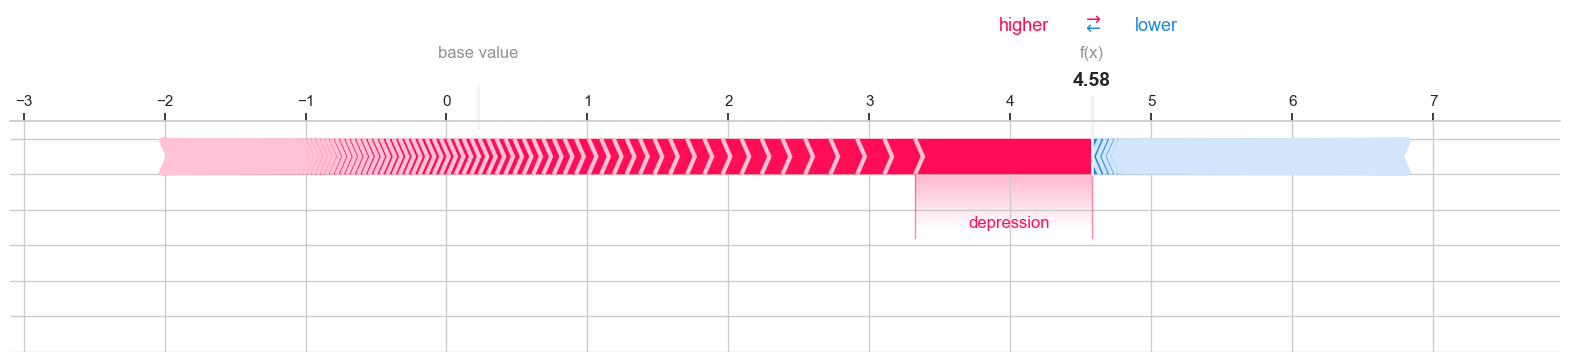


--- Sample 5 (True: RISK) ---
Text: mentalhealth depression http t co new ybx u http t co juf dkhiku...


<Figure size 640x480 with 0 Axes>

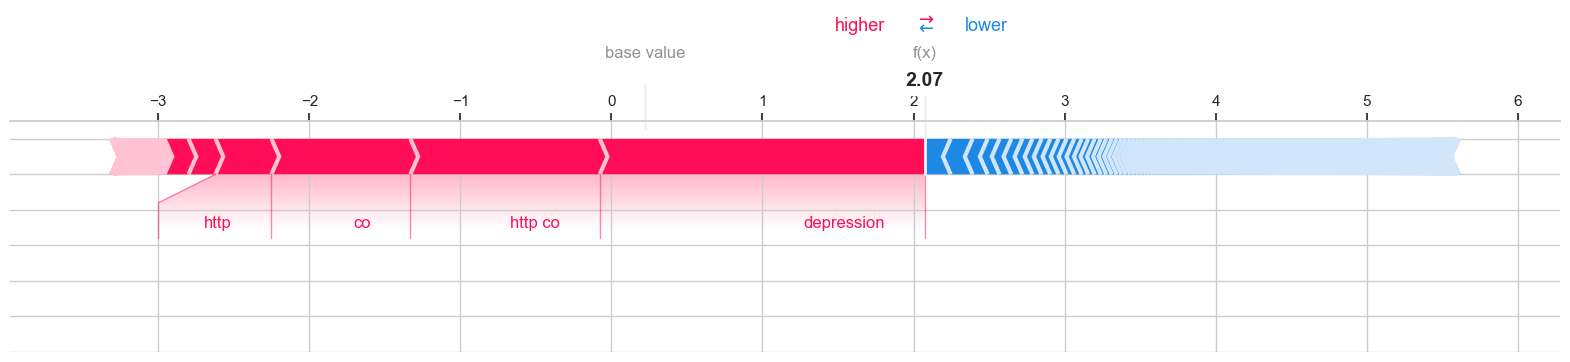


--- Sample 6 (True: RISK) ---
Text: this isn t getting better and i don t want to be here anymore...


<Figure size 640x480 with 0 Axes>

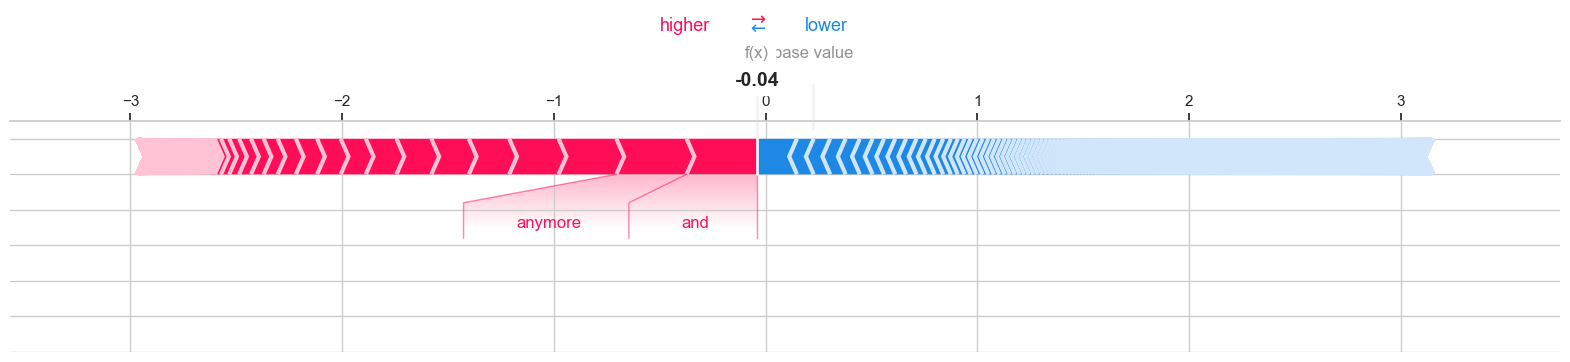


--- Sample 3 (True: NO RISK) ---
Text: mum soup made my stomach make nasty noise...


<Figure size 640x480 with 0 Axes>

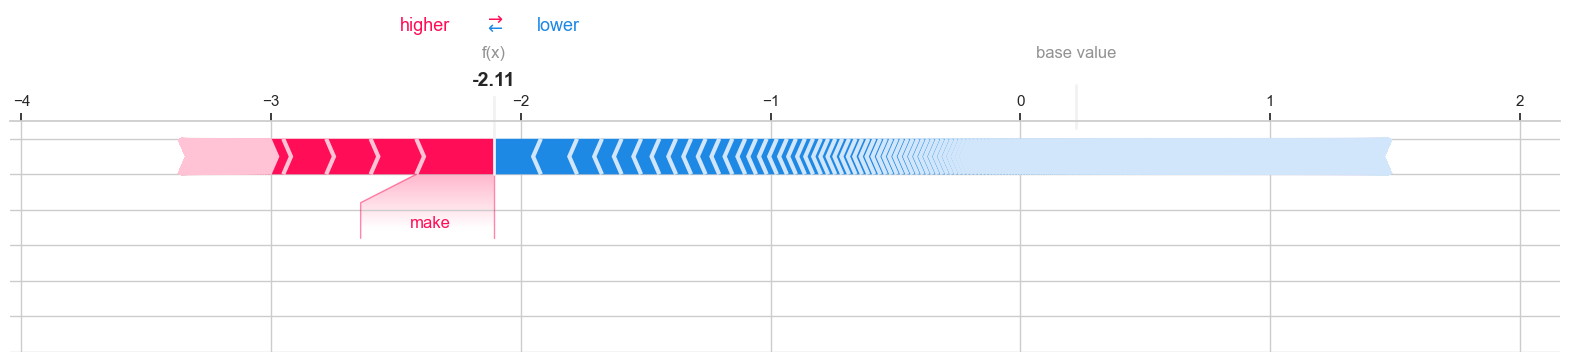


--- Sample 4 (True: NO RISK) ---
Text: cuprohastes don t feed car milky way though they don t like it that advert wa very misleading breaking down on the a isn t fun...


<Figure size 640x480 with 0 Axes>

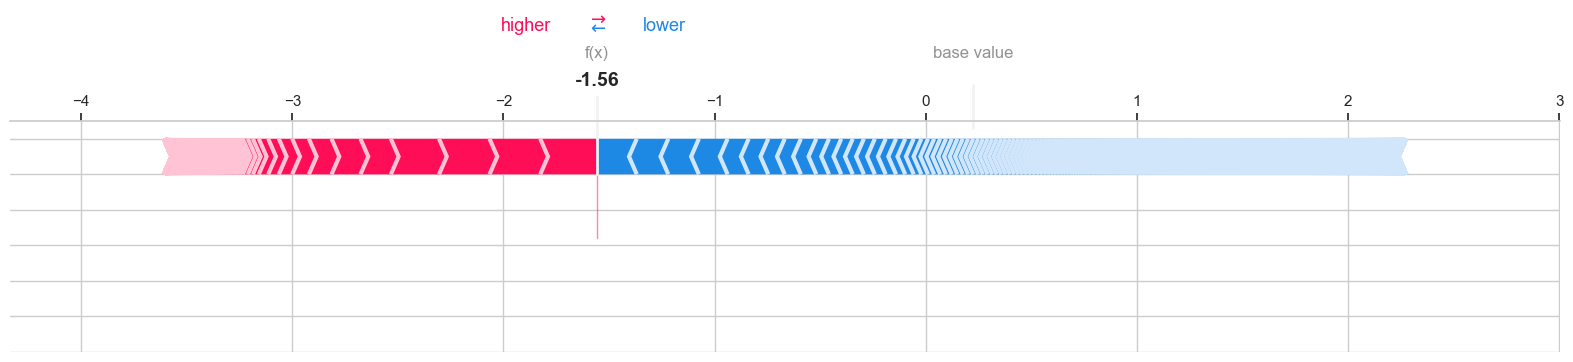


--- Sample 8 (True: NO RISK) ---
Text: vanidosa what s wrong why do you need an inhaler i didn t even know you were sick hope you start feeling better...


<Figure size 640x480 with 0 Axes>

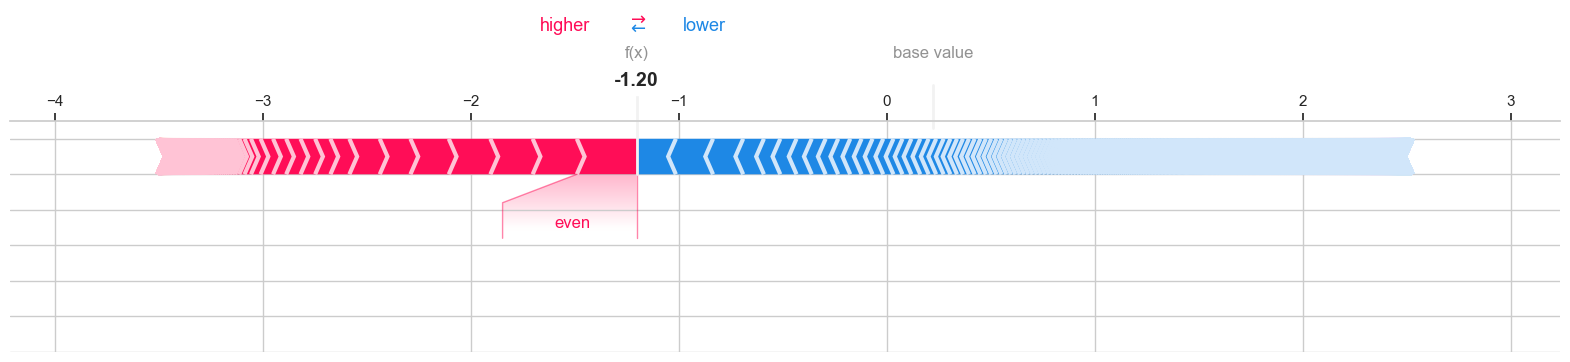


--- Sample 9 (True: NO RISK) ---
Text: shaundiviney i want pizzaaaa...


<Figure size 640x480 with 0 Axes>

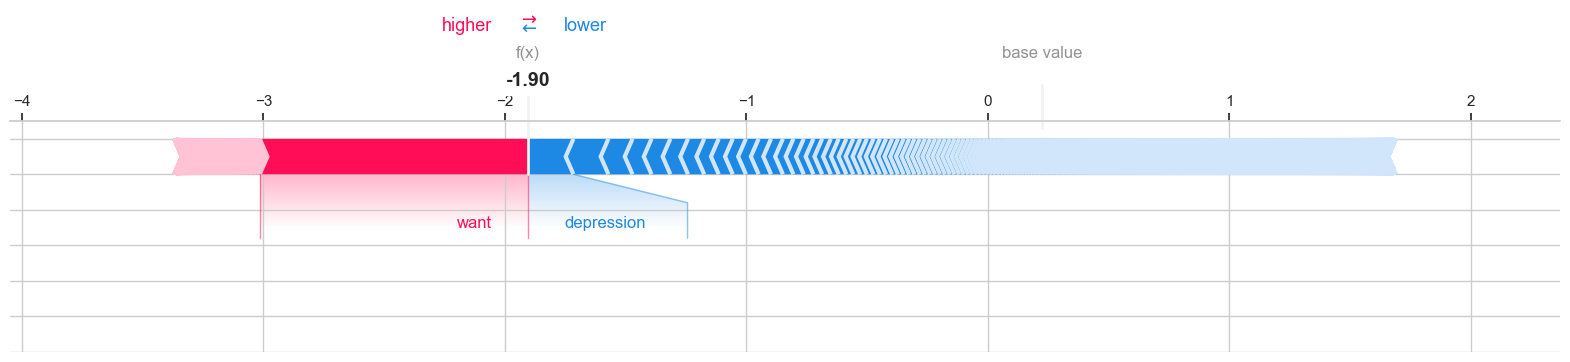


--- Sample 11 (True: NO RISK) ---
Text: i don t like these late start night shift coupled with it being bloody light outside my window when i m meant to be going to sleep...


<Figure size 640x480 with 0 Axes>

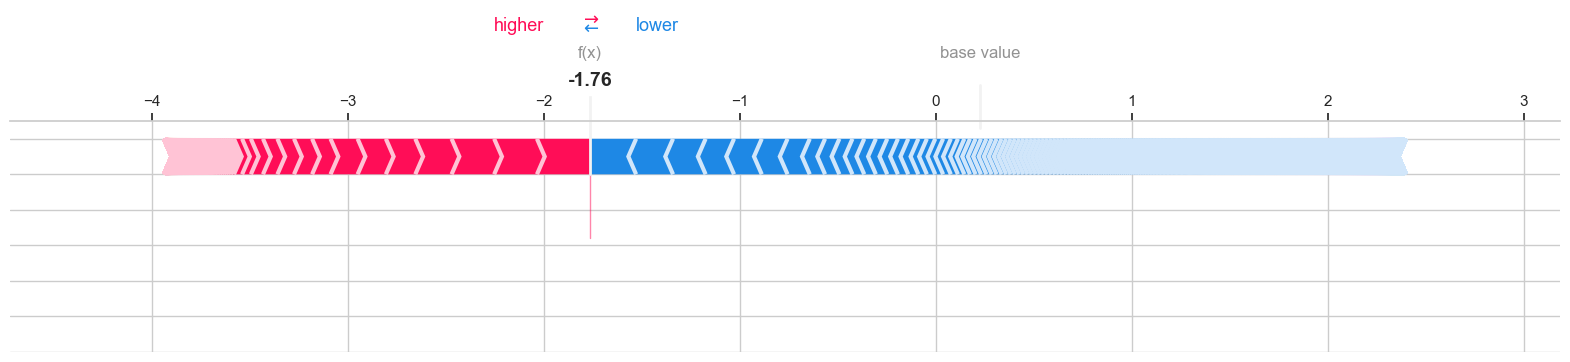

In [3]:
# Pick 5 Risk + 5 No-Risk samples
risk_idx = np.where(y_test == 1)[0][:5]
safe_idx = np.where(y_test == 0)[0][:5]
sample_indices = np.concatenate([risk_idx, safe_idx])

for i in sample_indices:
    label = "RISK" if y_test[i] == 1 else "NO RISK"
    print(f"\n--- Sample {i} (True: {label}) ---")
    print(f"Text: {texts_test[i][:150]}...")
    plt.figure()
    shap.force_plot(
        shap_explainer.expected_value,
        shap_values[i],
        feature_names=feature_names,
        matplotlib=True,
    )
    plt.show()

## 3. LIME — Instance-Level Explanations


--- LIME: Sample 0 (True: RISK) ---
Text: lately all i basically is sleep i just don t have the energy for anything else these day i wa told i need more intensive treatment but i just don t ha...


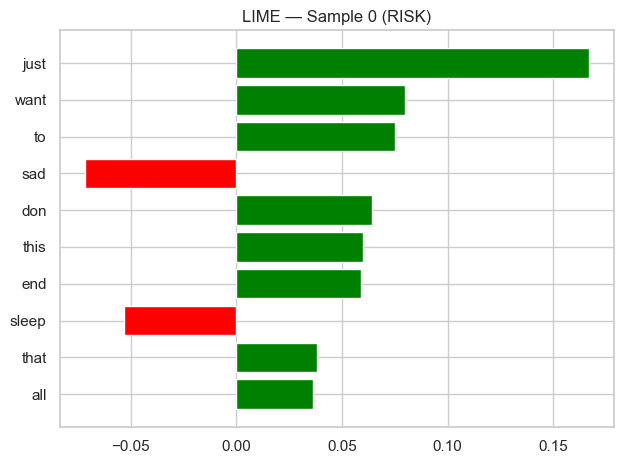

Top features: [('just', 0.16686292123117302), ('want', 0.07962376255054669), ('to', 0.07507002929678107), ('sad', -0.07167945502517135), ('don', 0.06434400271543443), ('this', 0.05978355256653564), ('end', 0.05901960059853123), ('sleep', -0.05340213297567187), ('that', 0.03824396514481818), ('all', 0.03624455071311087)]

--- LIME: Sample 1 (True: RISK) ---
Text: f i am just so tired i hate my life i know there s a beautiful side to life but oh my god i don t even wan na see it if the thing i ve been through ar...


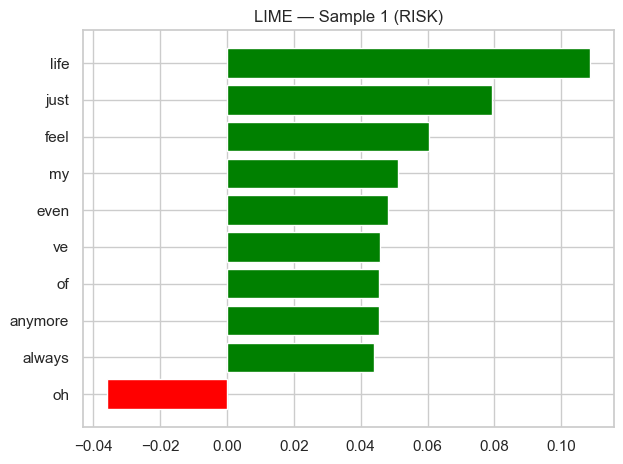

Top features: [('life', 0.10853739293443135), ('just', 0.07924354800888121), ('feel', 0.06031122007025779), ('my', 0.05109906347653319), ('even', 0.048071772958341835), ('ve', 0.04581122134974853), ('of', 0.04557962138162076), ('anymore', 0.04551651700168123), ('always', 0.043995590706309456), ('oh', -0.03595432140999838)]

--- LIME: Sample 2 (True: RISK) ---
Text: how would you feel if you had told someone that you were depressed and then later on they said that to you idk how to feel ab it on one hand i m like ...


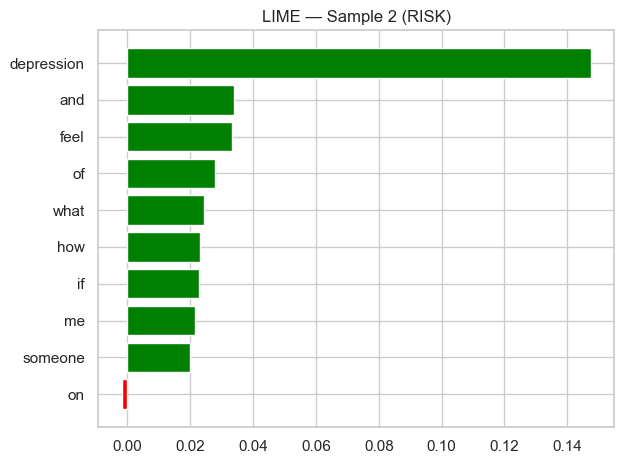

Top features: [('depression', 0.14739350294859907), ('and', 0.033901601790872114), ('feel', 0.03321074894632474), ('of', 0.027860133975196696), ('what', 0.02438108857623849), ('how', 0.0232291935168065), ('if', 0.02277836687995948), ('me', 0.021635826551282922), ('someone', 0.019951855609190935), ('on', -0.0018599564532567618)]

--- LIME: Sample 5 (True: RISK) ---
Text: mentalhealth depression http t co new ybx u http t co juf dkhiku...


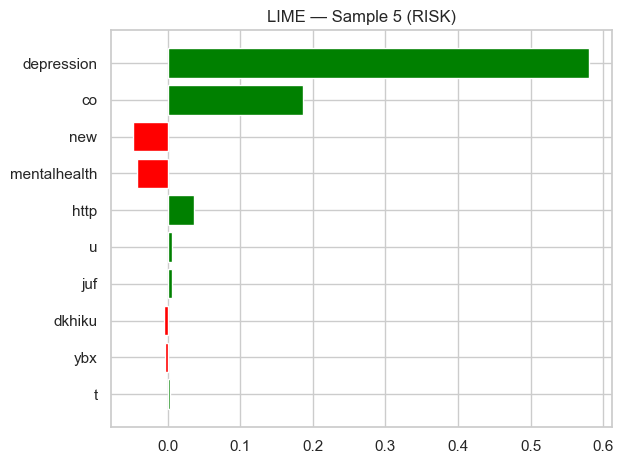

Top features: [('depression', 0.5801084651421861), ('co', 0.18620112527081828), ('new', -0.04704320349032317), ('mentalhealth', -0.04190204558509669), ('http', 0.036890433008646514), ('u', 0.006575639659169507), ('juf', 0.005661123568129515), ('dkhiku', -0.004276533581216832), ('ybx', -0.004090649663802896), ('t', 0.003146688586165035)]

--- LIME: Sample 6 (True: RISK) ---
Text: this isn t getting better and i don t want to be here anymore...


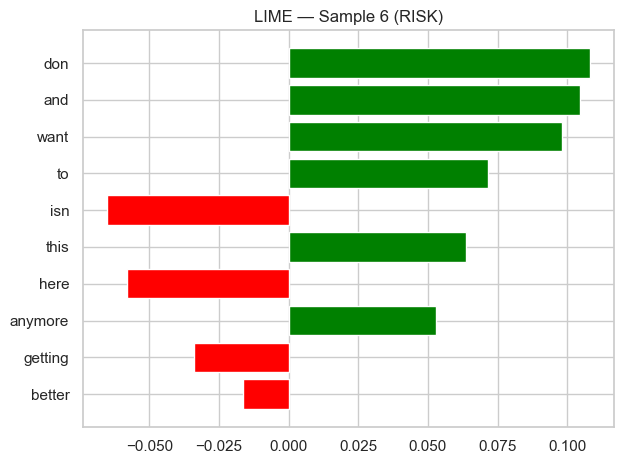

Top features: [('don', 0.10812404852373324), ('and', 0.10462076949667949), ('want', 0.09811287664002394), ('to', 0.07152637863271905), ('isn', -0.06534800384324574), ('this', 0.0637199263724508), ('here', -0.05804271513496863), ('anymore', 0.052907750521686545), ('getting', -0.03395921658608889), ('better', -0.0165845829625662)]

--- LIME: Sample 3 (True: NO RISK) ---
Text: mum soup made my stomach make nasty noise...


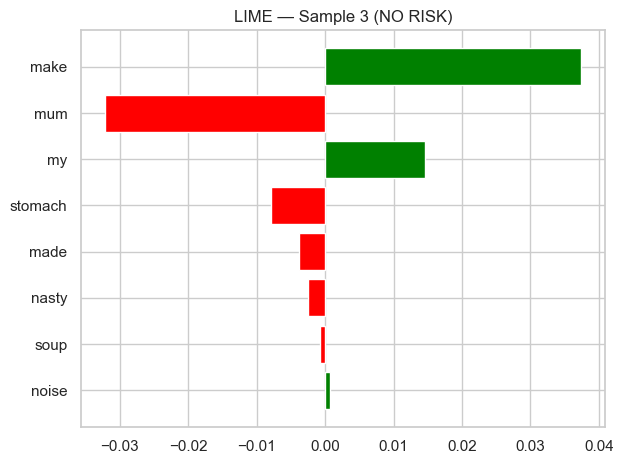

Top features: [('make', 0.037443865237044155), ('mum', -0.0322214088214145), ('my', 0.01462772549885021), ('stomach', -0.007878965799507111), ('made', -0.0038081382303544564), ('nasty', -0.0024328872929200193), ('soup', -0.0008178473994939145), ('noise', 0.0006458078147578608)]

--- LIME: Sample 4 (True: NO RISK) ---
Text: cuprohastes don t feed car milky way though they don t like it that advert wa very misleading breaking down on the a isn t fun...


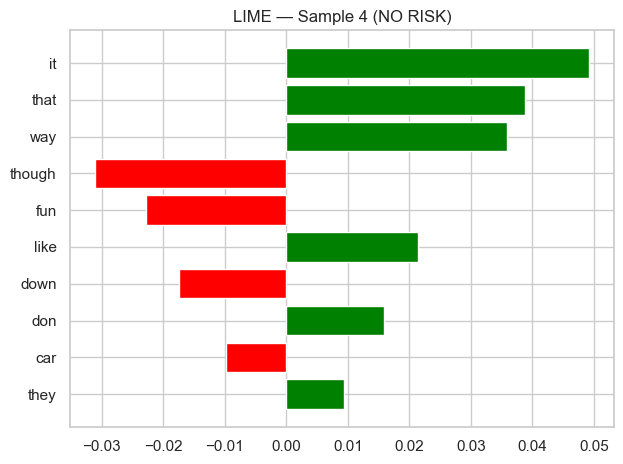

Top features: [('it', 0.049240682679354913), ('that', 0.03883875517616227), ('way', 0.03590534617677349), ('though', -0.031151021039170102), ('fun', -0.022744886306472947), ('like', 0.021365479602844965), ('down', -0.017451078786436553), ('don', 0.015882317256276934), ('car', -0.009721174235060692), ('they', 0.009405677925484721)]

--- LIME: Sample 8 (True: NO RISK) ---
Text: vanidosa what s wrong why do you need an inhaler i didn t even know you were sick hope you start feeling better...


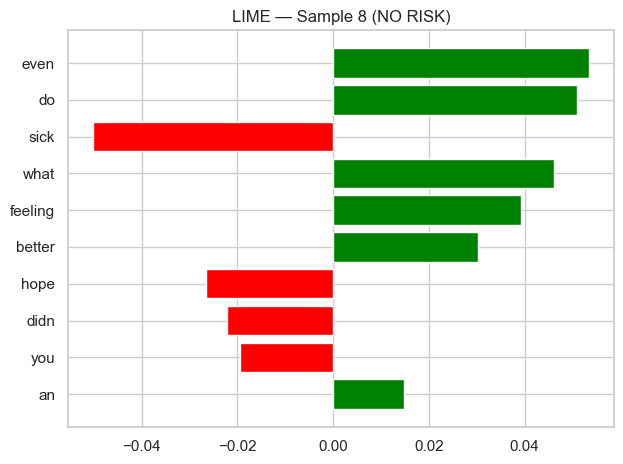

Top features: [('even', 0.053481080147925804), ('do', 0.05087005996542684), ('sick', -0.05015500129070182), ('what', 0.04615125338240079), ('feeling', 0.03918374926979101), ('better', 0.030336548408781472), ('hope', -0.026499486538871946), ('didn', -0.02208241016198078), ('you', -0.019572223829349034), ('an', 0.014813994666250909)]

--- LIME: Sample 9 (True: NO RISK) ---
Text: shaundiviney i want pizzaaaa...


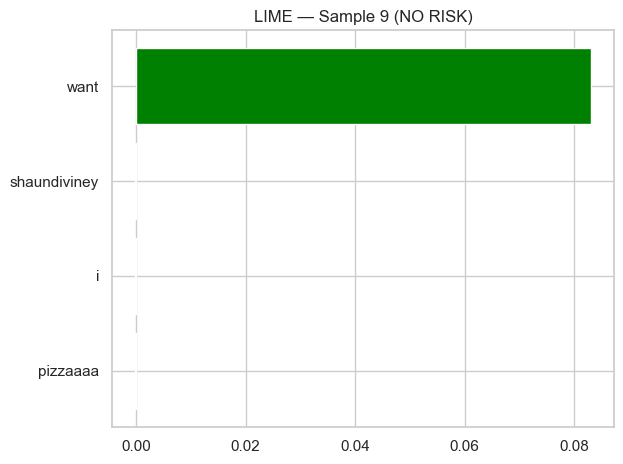

Top features: [('want', 0.08314144629326962), ('shaundiviney', -0.00017336924650941261), ('i', -0.00016788376000689595), ('pizzaaaa', -0.00015125536037329405)]

--- LIME: Sample 11 (True: NO RISK) ---
Text: i don t like these late start night shift coupled with it being bloody light outside my window when i m meant to be going to sleep...


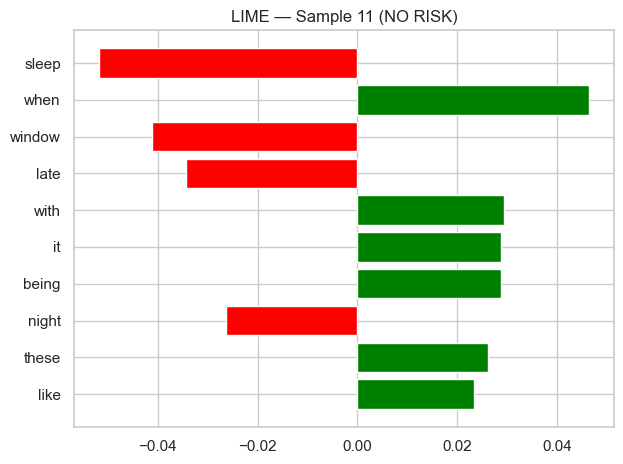

Top features: [('sleep', -0.05186069739671081), ('when', 0.046502267460309055), ('window', -0.04124620271074739), ('late', -0.0344110924517526), ('with', 0.029401121342014027), ('it', 0.02887018252770512), ('being', 0.02886463655803212), ('night', -0.026272090949163513), ('these', 0.026158088911546272), ('like', 0.023314347640605214)]


In [4]:
# LIME explanations for same 10 samples
for i in sample_indices:
    label = "RISK" if y_test[i] == 1 else "NO RISK"
    text = texts_test[i]
    print(f"\n--- LIME: Sample {i} (True: {label}) ---")
    print(f"Text: {text[:150]}...")

    exp = explain_lime(model, vectorizer, text, num_features=10)
    fig = exp.as_pyplot_figure()
    plt.title(f"LIME — Sample {i} ({label})")
    plt.tight_layout()
    plt.show()

    # Show top words
    print("Top features:", exp.as_list())

## 4. Quantitative Interpretability Score

**Interpretability Score** = (# of top-k SHAP features overlapping with mental health lexicon) / k

Mental Health Lexicon (174 words):
['abandon', 'abuse', 'addict', 'agitat', 'alcohol', 'alive', 'alone', 'always', 'angry', 'anxiety', 'anxious', 'anymore', 'anyone', 'appetite', 'ashamed', 'attack', 'bad', 'bed', 'better', 'binge', 'bipolar', 'brain', 'broken', 'burden', 'burn', 'can', 'college', 'confus', 'cope', 'coping', 'counselor', 'cried', 'cry', 'crying', 'cutting', 'day', 'dead', 'death', 'debt', 'depressed', 'depression', 'desperate', 'detach', 'diagnos', 'diagnosis', 'die', 'disappoint', 'disconnect', 'disorder', 'doctor', 'drain', 'dread', 'drug', 'eat', 'embarrass', 'emotion', 'empty', 'end', 'everybody', 'everything', 'exhaust', 'exhausted', 'failure', 'family', 'fatigue', 'fear', 'feel', 'feeling', 'felt', 'financial', 'food', 'friend', 'frustrat', 'good', 'guilt', 'harm', 'hate', 'head', 'health', 'help', 'helpless', 'hope', 'hopeless', 'hurt', 'ideation', 'insomnia', 'irritat', 'isol', 'isolat', 'job', 'kill', 'know', 'life', 'listen', 'live', 'lonely', 'lost', 'mania'

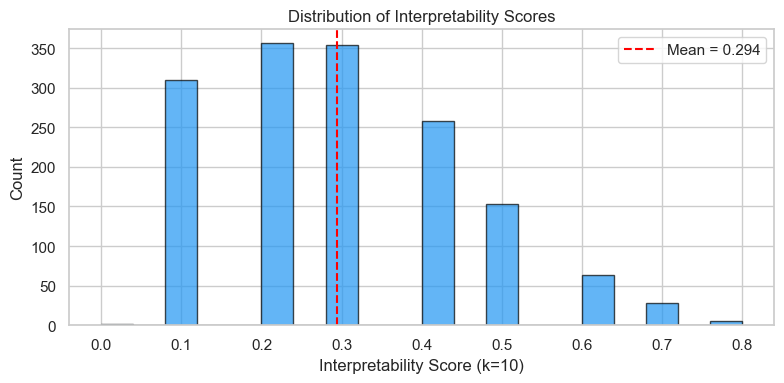

In [5]:
print(f"Mental Health Lexicon ({len(MH_LEXICON)} words):")
print(sorted(MH_LEXICON))

# Compute at k=10 and k=20
for k in [10, 20]:
    result = compute_interpretability_score(shap_values, feature_names, MH_LEXICON, k=k)
    print(f"\n--- Interpretability Score (k={k}) ---")
    print(f"  Mean:  {result['mean_score']:.4f}")
    print(f"  Std:   {result['std_score']:.4f}")

# Distribution plot
result_k10 = compute_interpretability_score(shap_values, feature_names, MH_LEXICON, k=10)
fig, ax = plt.subplots(figsize=(8, 4))
ax.hist(result_k10["per_sample_scores"], bins=20, edgecolor="black", alpha=0.7, color="#2196F3")
ax.axvline(result_k10["mean_score"], color="red", linestyle="--", label=f"Mean = {result_k10['mean_score']:.3f}")
ax.set_xlabel("Interpretability Score (k=10)")
ax.set_ylabel("Count")
ax.set_title("Distribution of Interpretability Scores")
ax.legend()
plt.tight_layout()
plt.show()

## 5. RQ1 Conclusion

**H1:** Explainable models can achieve ≥80% accuracy without major performance loss.

In [6]:
from src.evaluation import evaluate_single

metrics = evaluate_single(model, X_test, y_test)
accuracy = metrics["accuracy"]
interp_score = result_k10["mean_score"]

print("=" * 50)
print("RQ1 CONCLUSION")
print("=" * 50)
print(f"  Accuracy:              {accuracy:.4f}  (target ≥ 0.80)")
print(f"  F1 Score:              {metrics['f1']:.4f}")
print(f"  Interpretability (k=10): {interp_score:.4f}")
print()

if accuracy >= 0.80:
    print("✓ H1 SUPPORTED: Model achieves ≥80% accuracy with explainable architecture.")
    print(f"  SHAP and LIME provide human-interpretable feature attributions.")
    if interp_score >= 0.10:
        print(f"  Interpretability Score ({interp_score:.3f}) confirms alignment with MH indicators.")
    else:
        print(f"  Note: Low lexicon overlap ({interp_score:.3f}) — model may use broader contextual cues")
        print(f"  beyond explicit MH keywords, which is expected for TF-IDF with bigrams.")
else:
    print("✗ H1 NOT SUPPORTED: Model accuracy below 80% threshold.")

print("\nExplainability notebook complete ✓")

RQ1 CONCLUSION
  Accuracy:              0.9608  (target ≥ 0.80)
  F1 Score:              0.9588
  Interpretability (k=10): 0.2942

✓ H1 SUPPORTED: Model achieves ≥80% accuracy with explainable architecture.
  SHAP and LIME provide human-interpretable feature attributions.
  Interpretability Score (0.294) confirms alignment with MH indicators.

Explainability notebook complete ✓
